# Regressão Linear 

A regressão linear simples é um método de aprendizado supervisionado extremamente simples. É também um método paramétrico, visto que assumimos a relação linear entre os preditores e a variável resposta. 

In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')


### 01. Exemplo 01: Regressão Linear Simples

O conjunto de dados possui duas variáveis "Experiência (em meses)" e "Salário (em milhares $/ano)". Deste dataset podemos gerar algumas perguntas:

1. Será que o salário é influenciado pela experiência?
2. Podemos predizer o salário baseado na experiência? 

In [19]:
# Leitura do dataset
DATASET_PATH = './data/Experience-Salary.csv'
data = pd.read_csv(DATASET_PATH)

# Renomeando colunas 
data = data.rename({'exp(in months)': 'experience', 'salary(in thousands)': 'salary'}, axis=1)
data.head()

,experience,salary
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


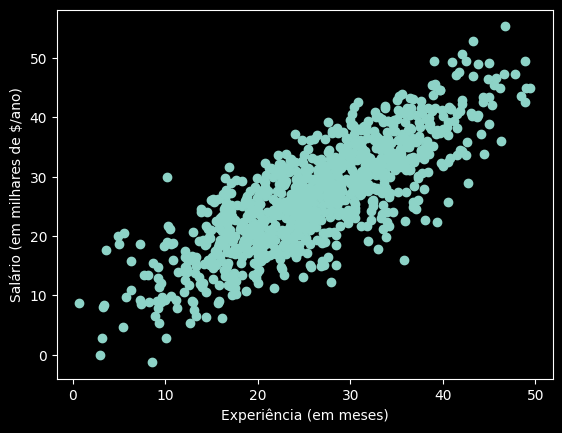

In [28]:
# Plotando os dados
plt.scatter(data.experience, data.salary,)
plt.xlabel("Experiência (em meses)")
plt.ylabel("Salário (em milhares de $/ano)")
plt.show()

In [49]:
# Variáveis: X -> preditora e Y -> resposta
X = ['experience']
Y = 'salary'

# Ajustando o modelo
model = LinearRegression()
model.fit(data[X], data[Y])

# Salvando os coeficientes
b0 = model.intercept_
b1 = model.coef_[0]

print(b0, b1)

5.198718564988564 0.8228466617029135


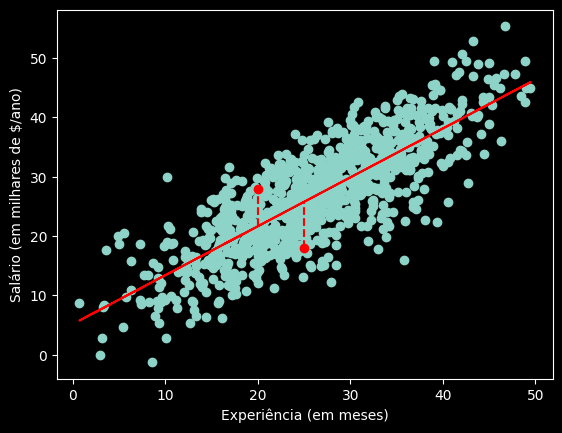

In [48]:
# Plotando todos os dados de treino
plt.scatter(data.experience, data.salary,)
plt.xlabel("Experiência (em meses)")
plt.ylabel("Salário (em milhares de $/ano)")

# Plotando a reta da regressão
plt.plot(data.experience, b0 + data.experience*b1, color='r')

# Plotando um exemplos de resíduo
plt.vlines(x=20, ymin=21.65, ymax=28, color='r', linestyles='--')
plt.scatter([20], [28], color='r')

plt.vlines(x=25, ymin=18, ymax=25.76, color='r', linestyles='--')
plt.scatter([25], [18], color='r')

# Mostrando o resultado
plt.show()

### 02. Exemplo 02: Regressão Linear Múltipla

A regressão linear múltipla é um método de aprendizado supervisionado paramétrico derivado da regressão linear simples. Ao invés de uma variável independente explicar uma dependente, temos N variáveis explicando Y ainda em uma relação linear.

O conjunto de dados possui três variáveis "Orçamento de marketing em redes sociais" e "Orçamento de marketing em rádio" e "Vendas". Deste dataset podemos gerar algumas perguntas:

1. Será que as vendas são influenciadas pelo tamanho do orçamento em marketing digital e em rádio?
2. Podemos predizer as vendas baseado nesses orçamentos? 

In [4]:
# Leitura do dataset
DATASET_PATH = './data/marketing_sales_data.csv'
data = pd.read_csv(DATASET_PATH, usecols=['Radio', 'Social Media', 'Sales'])

# Renomeando colunas 
data = data.rename({'exp(in months)': 'experience', 'salary(in thousands)': 'salary'}, axis=1)
data.head()

,Radio,Social Media,Sales
0,3.518070,2.293790,55.261284
1,7.756876,2.572287,67.574904
2,20.348988,1.227180,272.250108
3,20.108487,2.728374,195.102176
4,31.653200,7.776978,273.960377


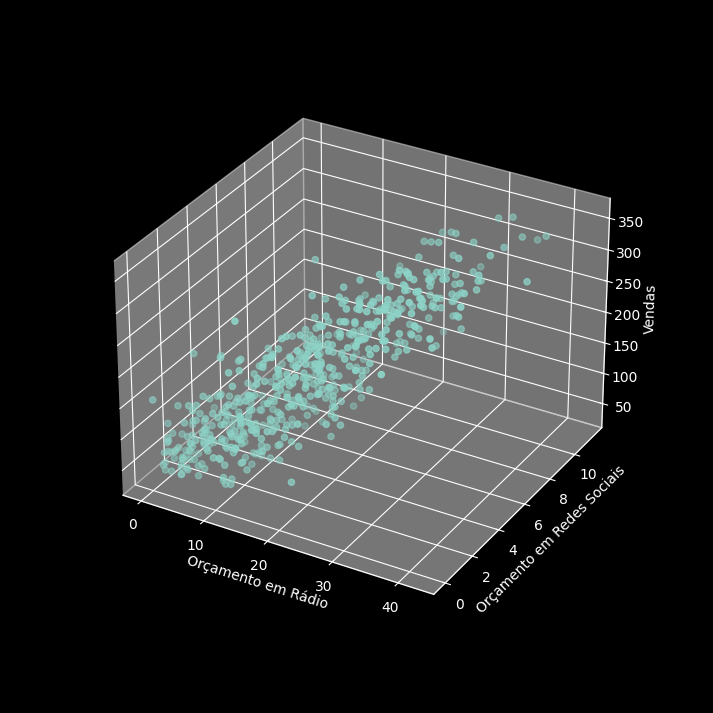

In [17]:
# Plotando os dados
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(projection='3d')
ax.scatter(data['Radio'], data['Social Media'], data['Sales'])
ax.set_xlabel('Orçamento em Rádio')
ax.set_ylabel('Orçamento em Redes Sociais')
ax.set_zlabel('Vendas')
ax.set_box_aspect(aspect=None, zoom=0.8)

In [28]:
# Variáveis: X -> preditora e Y -> resposta
X = ['Radio', 'Social Media']
Y = 'Sales'

# Ajustando o modelo
model = LinearRegression()
model.fit(data[X], data[Y])

# Salvando os coeficientes
b0 = model.intercept_
b = model.coef_

print(b0, b)

43.80995594956994 [8.28430423 0.10223717]


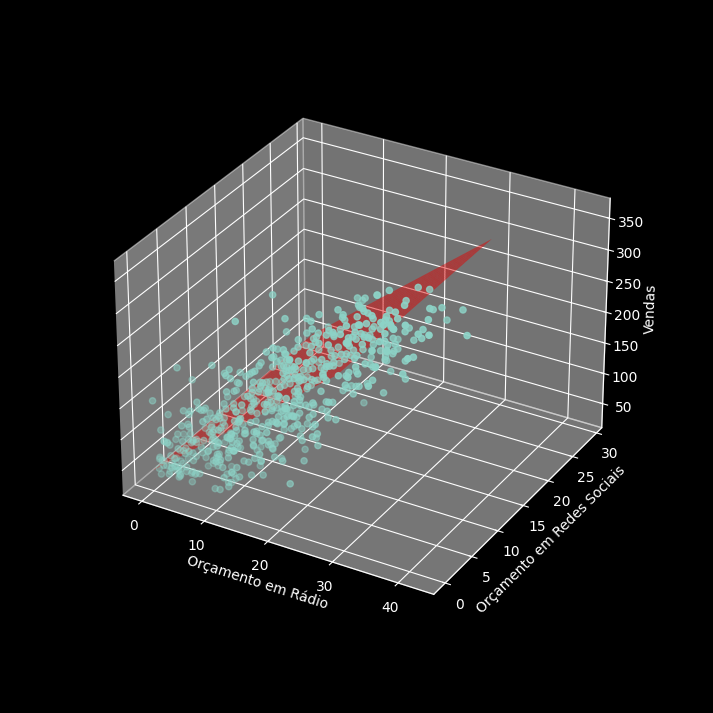

In [31]:
# Criando figura
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(projection='3d')

# Plotando todos os dados de treino
ax.scatter(data['Radio'], data['Social Media'], data['Sales'])
ax.set_xlabel('Orçamento em Rádio')
ax.set_ylabel('Orçamento em Redes Sociais')
ax.set_zlabel('Vendas')
ax.set_box_aspect(aspect=None, zoom=0.8)

# Plotando o plano da regressão
xs = np.tile(np.arange(30), (30,1))
ys = np.tile(np.arange(30), (30,1)).T
zs = xs*b[0]+ys*b[1]+b0
ax.plot_surface(xs,ys,zs, alpha=0.5, color='r')

# Mostrando o resultado
plt.show()

In [41]:
data['Estimated Sales'] = model.predict(data[X])
print('RSS: '+ str(np.sum(np.square(data['Estimated Sales'] - data['Sales']))))

RSS: 1216483.014526145
